<a href="https://colab.research.google.com/github/cij1012/pytorch/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_mydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("학습", device)

학습 cuda


In [0]:
torch.manual_seed(1012)
if device == 'cuda':
  torch.cuda.manual_seed_all(1012)

In [4]:
kmnist_train = dsets.KMNIST(root='KMNIST_data/',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)
kmnist_test = dsets.KMNIST(root='KMNIST_data/',
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True)

Extracting KMNIST_data/KMNIST/raw/train-images-idx3-ubyte.gz to KMNIST_data/KMNIST/raw


Extracting KMNIST_data/KMNIST/raw/train-labels-idx1-ubyte.gz to KMNIST_data/KMNIST/raw



Extracting KMNIST_data/KMNIST/raw/t10k-images-idx3-ubyte.gz to KMNIST_data/KMNIST/raw


Extracting KMNIST_data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to KMNIST_data/KMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
batch_size = 100

data_loader = DataLoader(dataset=kmnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)
val_loader = DataLoader(dataset=kmnist_test,
                        batch_size=batch_size)

In [0]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.model = nn.Sequential(
        nn.Linear(784,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.ReLU(),
        nn.Linear(32,10)
    )
  def forward(self,x):
    x = x.view(-1,28*28)
    return self.model(x)

In [0]:
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.05)

epochs = 10

In [16]:
total_batch = len(data_loader)+len(val_loader)

train_losses = []
val_losses = []

for epoch in range(epochs):
  avg_cost=0
  for i,data in enumerate(data_loader):
    imgs, labels=data
    imgs = imgs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    hypothesis=model(imgs)
    cost = criterion(hypothesis,labels)
    cost.backward()
    optimizer.step()
    train_losses.append(cost.item())

    avg_cost += cost/total_batch

  print('epoch {} train_cost = {}'.format(epoch+1, avg_cost))

  for i,data in enumerate(val_loader):
    imgs,labels=data
    imgs=imgs.to(device)
    labels=labels.to(device)

    optimizer.zero_grad()
    hypothesis=model(imgs)
    cost=criterion(hypothesis,labels)
    cost.backward()
    optimizer.step()
    val_losses.append(cost.item())

    avg_cost += cost/total_batch
  print('epoch {} val_cost = {}'.format(epoch+1,avg_cost))
  print('-'*30)

epoch 1 train_cost = 1.009431004524231
epoch 1 val_cost = 1.136475920677185
------------------------------
epoch 2 train_cost = 0.4325231611728668
epoch 2 val_cost = 0.5295610427856445
------------------------------
epoch 3 train_cost = 0.3333868980407715
epoch 3 val_cost = 0.41443923115730286
------------------------------
epoch 4 train_cost = 0.27653467655181885
epoch 4 val_cost = 0.34711119532585144
------------------------------
epoch 5 train_cost = 0.23819534480571747
epoch 5 val_cost = 0.30036404728889465
------------------------------
epoch 6 train_cost = 0.209780752658844
epoch 6 val_cost = 0.26560506224632263
------------------------------
epoch 7 train_cost = 0.18925324082374573
epoch 7 val_cost = 0.24029068648815155
------------------------------
epoch 8 train_cost = 0.17235079407691956
epoch 8 val_cost = 0.21952223777770996
------------------------------
epoch 9 train_cost = 0.15889616310596466
epoch 9 val_cost = 0.20250684022903442
------------------------------
epoch 10 t

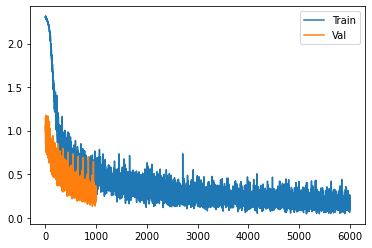

In [20]:
plt.plot(train_losses,label='Train')
plt.plot(val_losses,label='Val')
plt.legend()
plt.show()

In [10]:
with torch.no_grad():
  correct = 0
  total = 0

  for i,data in enumerate(data_loader):
    imgs,labels=data
    imgs=imgs.to(device)
    labels=labels.to(device)

    prediction=model(imgs)
    _,argmax= torch.max(prediction,1)
    total += imgs.size(0)
    correct += (labels == argmax).sum().item()

  print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))


Test accuracy for 60000 images: 95.49%
